In [1]:
import pandas as pd
df = pd.read_csv("Indian_Kids_Screen_Time.csv")
print(df.head())

   Age  Gender  Avg_Daily_Screen_Time_hr Primary_Device  \
0   14    Male                      3.99     Smartphone   
1   11  Female                      4.61         Laptop   
2   18  Female                      3.73             TV   
3   15  Female                      1.21         Laptop   
4   12  Female                      5.89     Smartphone   

   Exceeded_Recommended_Limit  Educational_to_Recreational_Ratio  \
0                        True                               0.42   
1                        True                               0.30   
2                        True                               0.32   
3                       False                               0.39   
4                        True                               0.49   

           Health_Impacts Urban_or_Rural  
0  Poor Sleep, Eye Strain          Urban  
1              Poor Sleep          Urban  
2              Poor Sleep          Urban  
3                     NaN          Urban  
4     Poor Sleep, Anx

In [2]:
df.isnull().sum()


Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


In [4]:
df.shape 


(9712, 8)

In [5]:
df['Health_Impacts'].fillna('None', inplace=True)


In [6]:
(df['Avg_Daily_Screen_Time_hr'] == 0.0).sum()


np.int64(226)

In [7]:
df['Avg_Daily_Screen_Time_hr'] = df.groupby('Gender')['Avg_Daily_Screen_Time_hr'] \
                                   .transform(lambda x: x.fillna(x.mean()))


In [8]:
(df['Avg_Daily_Screen_Time_hr'] == 0.0).sum()      # should be 0 now
df['Avg_Daily_Screen_Time_hr'].isna().sum()        # should also be 0


np.int64(0)

In [9]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)


In [10]:
df.drop_duplicates(inplace=True)


In [11]:
df.duplicated().sum()


np.int64(0)

In [17]:
df.shape 


(9668, 8)

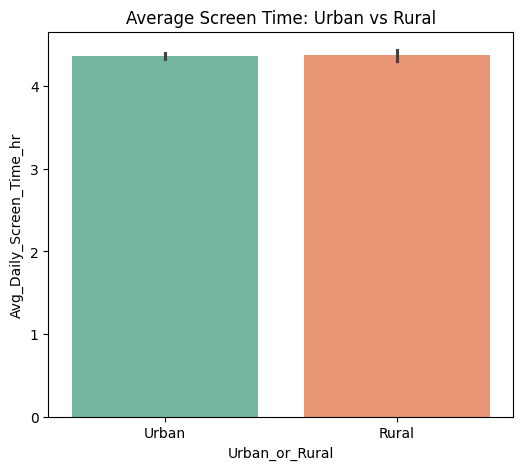

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,5))
sns.barplot(x='Urban_or_Rural', y='Avg_Daily_Screen_Time_hr', data=df, palette='Set2',  hue='Urban_or_Rural')
plt.title('Average Screen Time: Urban vs Rural')
plt.show()


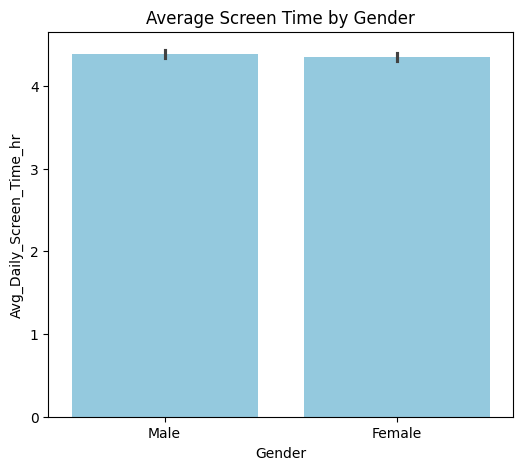

In [15]:
plt.figure(figsize=(6,5))
sns.barplot(x='Gender', y='Avg_Daily_Screen_Time_hr', data=df, color='skyblue')
plt.title('Average Screen Time by Gender')
plt.show()


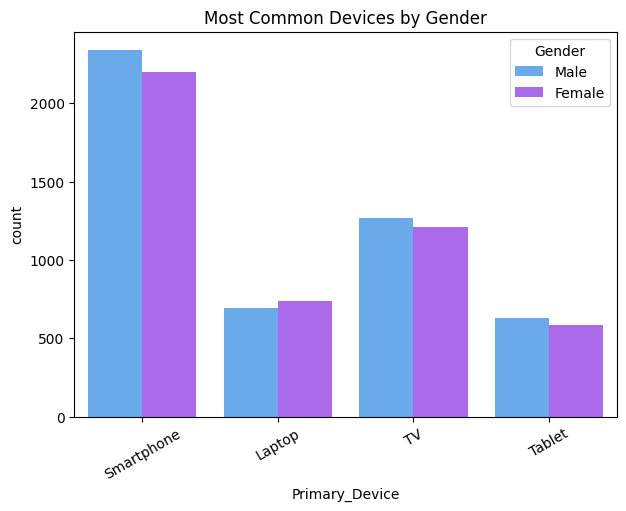

In [14]:
plt.figure(figsize=(7,5))
sns.countplot(x='Primary_Device', hue='Gender', data=df, palette='cool')
plt.title('Most Common Devices by Gender')
plt.xticks(rotation=30)
plt.show()


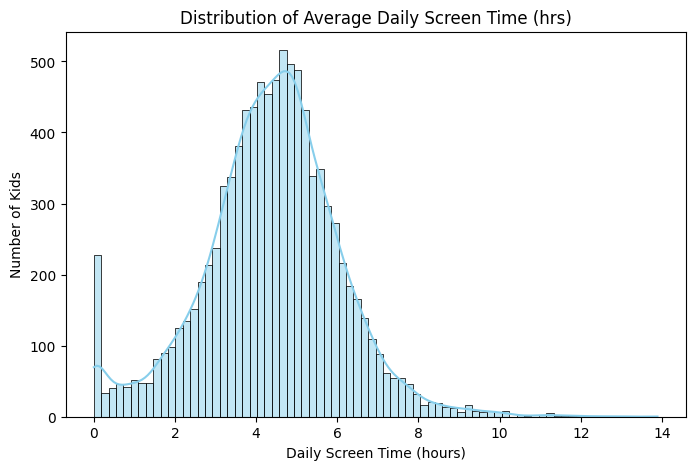

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(df['Avg_Daily_Screen_Time_hr'], kde=True, color='skyblue')
plt.title('Distribution of Average Daily Screen Time (hrs)')
plt.xlabel('Daily Screen Time (hours)')
plt.ylabel('Number of Kids')
plt.show()


In [49]:
df['Age_Band'] = pd.cut(
    df['Age'],
    bins=[4, 10, 15, 20],  # edges of bins
    labels=['5-10', '11-15', '16-20']
)


In [50]:
df['Age_Band'].value_counts().sort_index()


Age_Band
5-10     2638
11-15    4399
16-20    2631
Name: count, dtype: int64

C:\Users\sweth\AppData\Local\Temp\ipykernel_15104\3450656418.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age_Band',data=df, palette='pastel')


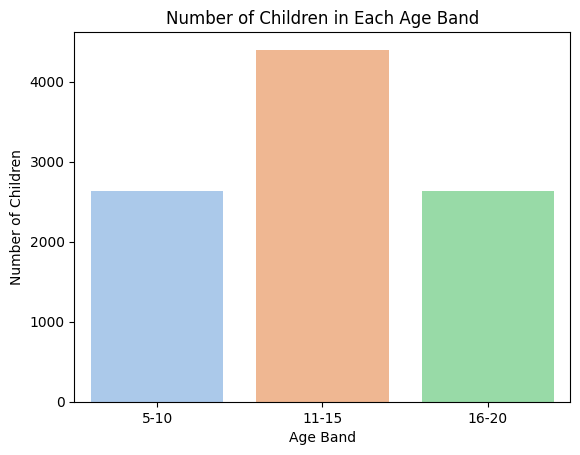

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Age_Band',data=df, palette='pastel')

plt.title('Number of Children in Each Age Band')
plt.xlabel('Age Band')
plt.ylabel('Number of Children')
plt.show()


In [52]:
import pandas as pd
import numpy as np

# Create random dates within a month
df['Date'] = pd.to_datetime(np.random.choice(pd.date_range('2025-10-01', '2025-10-31'), size=len(df)))

# Now add the Day_Type column
df['Day_Type'] = df['Date'].dt.day_name().apply(lambda x: 'Weekend' if x in ['Saturday','Sunday'] else 'Weekday')

# Check
print(df[['Date', 'Day_Type']].head())


        Date Day_Type
0 2025-10-11  Weekend
1 2025-10-03  Weekday
2 2025-10-26  Weekend
3 2025-10-02  Weekday
4 2025-10-01  Weekday


In [53]:
df['Day_Type'].value_counts()


Day_Type
Weekday    7125
Weekend    2543
Name: count, dtype: int64

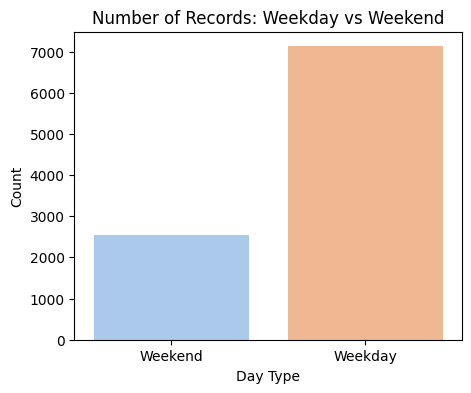

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,4))
sns.countplot(x='Day_Type',hue='Day_Type', data=df, palette='pastel',legend=False)
plt.title('Number of Records: Weekday vs Weekend')
plt.xlabel('Day Type')
plt.ylabel('Count')
plt.show()


In [55]:
device_total = df.groupby('Primary_Device')['Avg_Daily_Screen_Time_hr'].sum()
print(device_total)


Primary_Device
Laptop         6380.52
Smartphone    20022.10
TV            10654.27
Tablet         5170.81
Name: Avg_Daily_Screen_Time_hr, dtype: float64


In [56]:
device_share = (device_total / device_total.sum()) * 100
print(device_share)


Primary_Device
Laptop        15.109798
Smartphone    47.414612
TV            25.230524
Tablet        12.245067
Name: Avg_Daily_Screen_Time_hr, dtype: float64


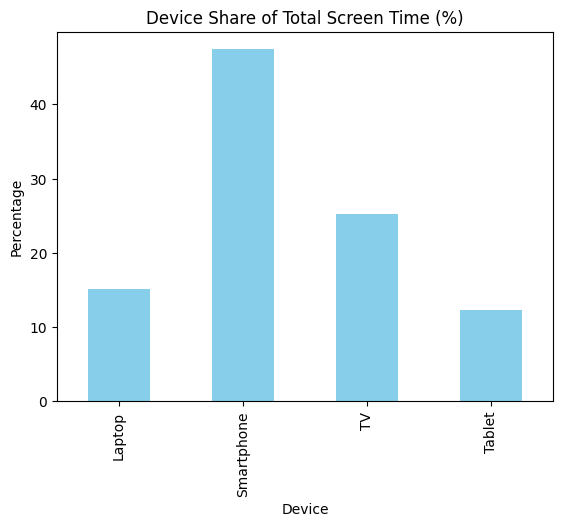

In [57]:
import matplotlib.pyplot as plt

device_share.plot(kind='bar', color='skyblue')
plt.title('Device Share of Total Screen Time (%)')
plt.ylabel('Percentage')
plt.xlabel('Device')
plt.show()


In [58]:
# Calculate educational and recreational time for each child
df['Educational_Time'] = df['Avg_Daily_Screen_Time_hr'] * df['Educational_to_Recreational_Ratio']
df['Recreational_Time'] = df['Avg_Daily_Screen_Time_hr'] - df['Educational_Time']

# Sum across dataset
edu_total = df['Educational_Time'].sum()
rec_total = df['Recreational_Time'].sum()
total = edu_total + rec_total

# Calculate shares
edu_share = (edu_total / total) * 100
rec_share = (rec_total / total) * 100

print(f"Educational Share: {edu_share:.2f}%")
print(f"Recreational Share: {rec_share:.2f}%")


Educational Share: 42.47%
Recreational Share: 57.53%


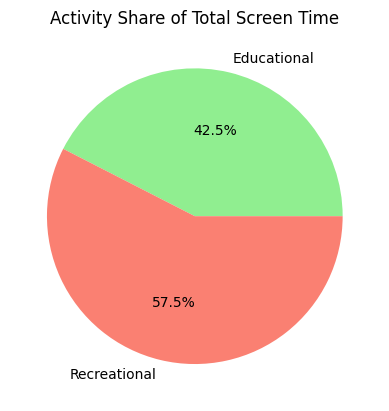

In [59]:
plt.pie([edu_share, rec_share], labels=['Educational', 'Recreational'], autopct='%1.1f%%', colors=['lightgreen','salmon'])
plt.title('Activity Share of Total Screen Time')
plt.show()


In [47]:
df.to_csv('preprocessed_data.csv', index=False)
